In [1]:
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Drgania

Poniżej znajdują się przykłady różnych typów drgań.

Uwaga: Ponieważ część nazw zmiennych wykorzystanych w przykładach pokrywa się, każdą komórkę należy wykonać przed użyciem interaktywnych wykresów.

# Prosty ruch harmoniczny

Równanie

$$m\frac{d^2 x}{dt^2} = - k x$$

lub inaczej

$$\frac{d^2 x}{dt^2} = - w_0^2 x,$$

gdzie $w_0^2 = k / m$.

Text(0, 0.5, 'x')

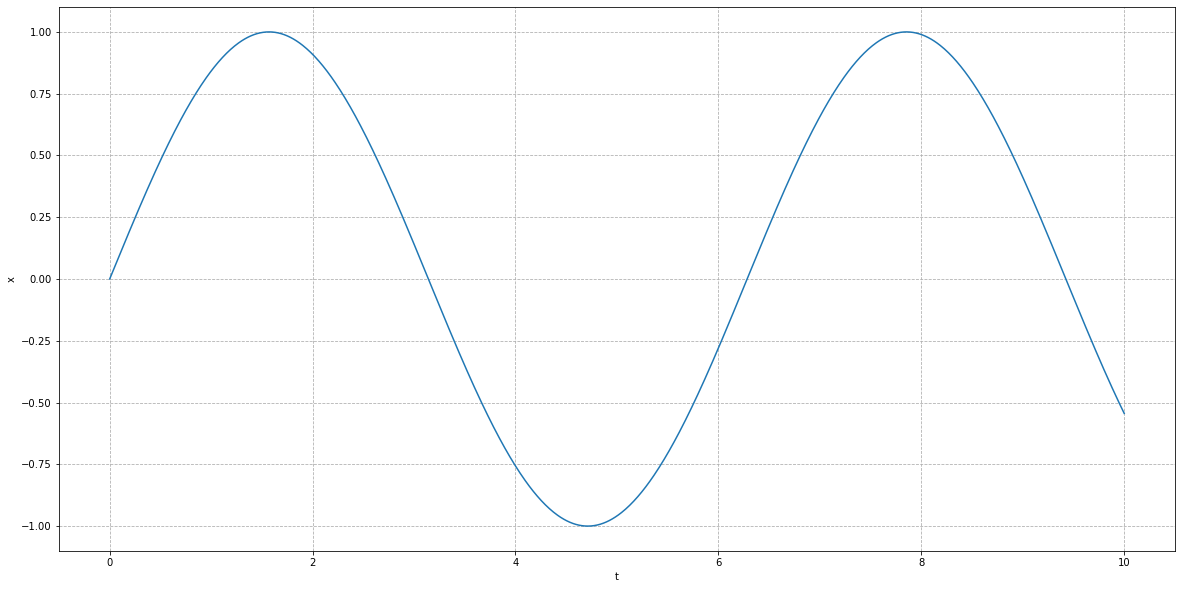

In [2]:
k = 1
m = 1

def F(x):
    return -k * x

def f(y, t):
    x, v = y
    return (v, F(x) / m)

ts = np.linspace(0, 10, 1000)

x0 = 0
v0 = 1

xs, vs = integ.odeint(f, (x0, v0), ts).T

plt.figure(figsize = (20, 10))
plt.plot(ts, xs)
plt.grid(linestyle = '--')
plt.xlabel('t')
plt.ylabel('x')

# Drgania tłumione

Równanie

$$m\frac{d^2 x}{dt^2} = - k x - b v$$

lub inaczej

$$\frac{d^2 x}{dt^2} = - w_0^2 x - \beta v,$$

gdzie $w_0^2 = k / m$, $\beta = b / m$.

In [3]:
k = 1
m = 1
x0 = 0
v0 = 1

def F(x, v, b):
    return -k * x - b * v

def f(y, t, b):
    x, v = y
    return (v, F(x, v, b) / m)

def envterm(t, b):
    return v0 * np.sqrt(k / m) * np.exp(-0.5 * b * t / m)
    
ts = np.linspace(0, 20, 1000)

def vis(b, e):
    xs, vs = integ.odeint(f, (x0, v0), ts, args = (b,)).T

    plt.figure(figsize = (20, 10))
    plt.plot(ts, xs)
    if(e):
        plt.plot(ts, envterm(ts, b), 'r-')
    plt.grid(linestyle = '--')
    plt.ylim(-1.1, 1.1)
    plt.xlabel('t')
    plt.ylabel('x')
    
widgets.interact(vis, b = widgets.FloatSlider(min=0, max=2.5, step=0.1, value=0), e = widgets.Checkbox(False))

interactive(children=(FloatSlider(value=0.0, description='b', max=2.5), Checkbox(value=False, description='e')…

<function __main__.vis(b, e)>

# Drgania wymuszone

Równanie

$$m\frac{d^2 x}{dt^2} = - k x + A \cos(\omega t)$$

lub inaczej

$$\frac{d^2 x}{dt^2} = - w_0^2 x + \alpha \cos(\omega t),$$

gdzie $w_0^2 = k / m$, $\alpha = A / m$.

In [4]:
k = 1
m = 1
x0 = 0
v0 = 0 # dla v0 != 0 envterm nie bedzie sie zgadzal
A = 1

def F(x, v, t, w):
    return -k * x + A * np.cos(w * t)

def f(y, t, w):
    x, v = y
    return (v, F(x, v, t, w) / m)

def envterm(t, w):
    w0 = np.sqrt(k / m)
    if(w != w0):
        return 2 * A * np.sin(0.5 * (w0 - w) * t) / ((w0 * w0 - w * w) * m)
    return A * t  / (2.0 * w0 * m)

ts = np.linspace(0, 100, 10000)

def vis(w, e):
    xs, vs = integ.odeint(f, (x0, v0), ts, args = (w,)).T

    plt.figure(figsize = (20, 10))
    plt.plot(ts, xs)
    if(e):
        plt.plot(ts, envterm(ts, w), 'r-')    
    plt.grid(linestyle = '--')
    plt.xlabel('t')
    plt.ylabel('x')
    
widgets.interact(vis, w = widgets.FloatSlider(min=0, max=1.5, step=0.01, value=0), e = widgets.Checkbox(False))

interactive(children=(FloatSlider(value=0.0, description='w', max=1.5, step=0.01), Checkbox(value=False, descr…

<function __main__.vis(w, e)>